In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("C:/Users/Win10/Desktop/tyl/cancer.csv")

In [3]:
print(dataset.shape)
print(dataset.head(5))

(569, 32)
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   8510426          0       13.540         14.36           87.46      566.3   
1   8510653          0       13.080         15.71           85.63      520.0   
2   8510824          0        9.504         12.44           60.34      273.9   
3    854941          0       13.030         18.42           82.61      523.8   
4  85713702          0        8.196         16.84           51.71      201.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09779           0.08129         0.06664             0.047810   
1          0.10750           0.12700         0.04568             0.031100   
2          0.10240           0.06492         0.02956             0.020760   
3          0.08983           0.03766         0.02562             0.029230   
4          0.08600           0.05943         0.01588             0.005917   

   ...  radius_worst  texture_worst  perimeter

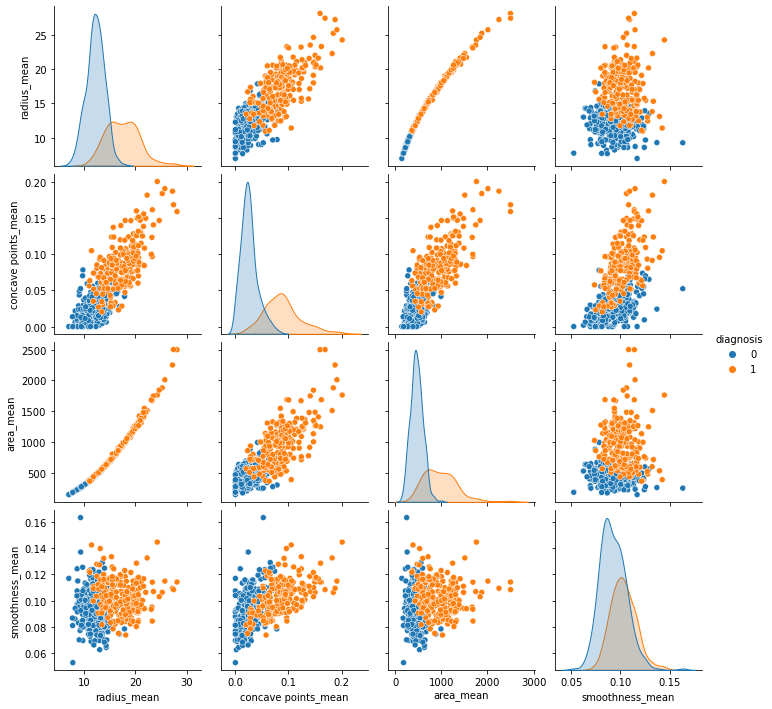

In [4]:
import seaborn as sns
sns.pairplot(dataset, hue='diagnosis',vars = ['radius_mean','concave points_mean','area_mean','smoothness_mean'])

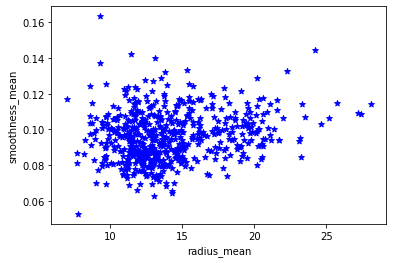

In [46]:
plt.xlabel('radius_mean')
plt.ylabel('smoothness_mean')
plt.scatter(dataset.radius_mean,dataset.smoothness_mean,color='blue',marker='*')

In [48]:
X = dataset.drop(labels=['id','diagnosis','texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis='columns')
X

,radius_mean
0,13.540
1,13.080
2,9.504
3,13.030
4,8.196
...,...
564,20.920
565,21.560
566,20.130
567,16.600


In [42]:
Y = dataset.area_mean
Y

0       566.3
1       520.0
2       273.9
3       523.8
4       201.9
        ...  
564    1347.0
565    1479.0
566    1261.0
567     858.1
568    1265.0
Name: area_mean, Length: 569, dtype: float64

In [50]:
Y = dataset.smoothness_mean
Y

0      0.09779
1      0.10750
2      0.10240
3      0.08983
4      0.08600
        ...   
564    0.10990
565    0.11100
566    0.09780
567    0.08455
568    0.11780
Name: smoothness_mean, Length: 569, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [52]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

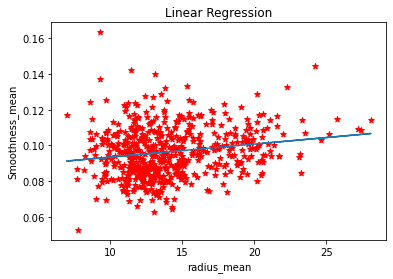

In [53]:
plt.scatter(X,Y, color="red",marker='*')
plt.plot(X, model.predict(X))
plt.title("Linear Regression")
plt.xlabel("radius_mean")
plt.ylabel("Smoothness_mean")
plt.show()

In [54]:
from sklearn import metrics
print('MAE = ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE = ',metrics.mean_squared_error(y_test, y_pred)) 

MAE =  0.3886131578947368
MSE =  0.30225338886842107


No Skill: ROC AUC=50.000
Logistic Skill: ROC AUC=98.985


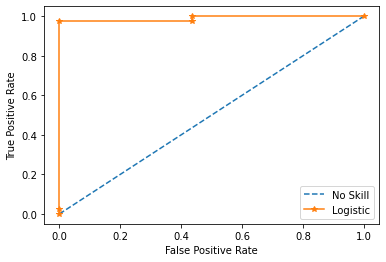

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lsProbability = lsProbability[:, 1]
# calculate scores
nsAUC = roc_auc_score(y_test, nsProbability)
lrAUC = roc_auc_score(y_test, lsProbability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' % (lrAUC*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(y_test, lsProbability)
# plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

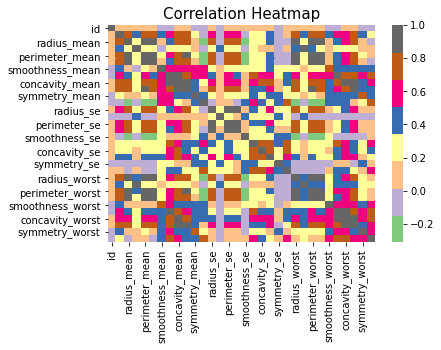

In [29]:

sns.heatmap(dataset.corr(),cmap='Accent')
plt.title('Correlation Heatmap',fontsize=15)
plt.show()